<a href="https://colab.research.google.com/github/melvinaquartey/ml-homework/blob/main/ML_Homework5_prob1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Melvina Quartey RIN: 662067086
### ML Homework 5
Question 1

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# CNN model
model = Sequential()
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(32, 32, 3)))  # Input shape
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Output classes

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


170498071/170498071 [==============================] - 3s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        4864      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 32)          9248      
                                                       

Epoch 1/10
782/782 [==============================] - 87s 109ms/step - loss: 1.6380 - accuracy: 0.4026 - val_loss: 1.4014 - val_accuracy: 0.4856
Epoch 2/10
782/782 [==============================] - 86s 110ms/step - loss: 1.3244 - accuracy: 0.5263 - val_loss: 1.2934 - val_accuracy: 0.5382
Epoch 3/10
782/782 [==============================] - 84s 108ms/step - loss: 1.1953 - accuracy: 0.5769 - val_loss: 1.2302 - val_accuracy: 0.5643
Epoch 4/10
782/782 [==============================] - 85s 109ms/step - loss: 1.1049 - accuracy: 0.6121 - val_loss: 1.1155 - val_accuracy: 0.6126
Epoch 5/10
782/782 [==============================] - 86s 110ms/step - loss: 1.0391 - accuracy: 0.6349 - val_loss: 1.0334 - val_accuracy: 0.6393
Epoch 6/10
782/782 [==============================] - 98s 126ms/step - loss: 0.9813 - accuracy: 0.6556 - val_loss: 1.0321 - val_accuracy: 0.6373
Epoch 7/10
782/782 [==============================] - 101s 129ms/step - loss: 0.9368 - accuracy: 0.6701 - val_loss: 1.0561 - val_a

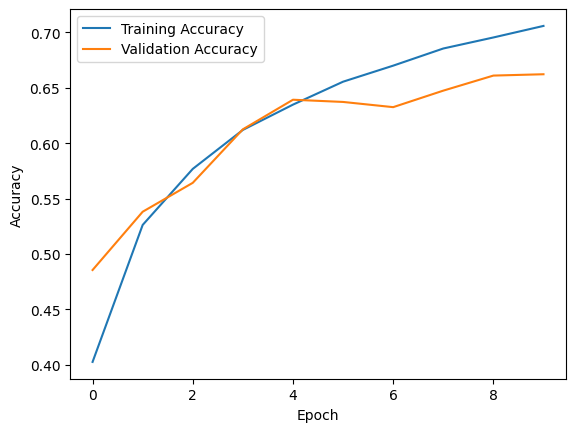

In [2]:
# Use the test set as validation data
x_val = x_test
y_val = y_test

# Train the model with the train set and validate using the test set
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

# Plot training and validation accuracies
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()